In [155]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import unquote
import networkx as nx
from scipy.sparse.csgraph import shortest_path




In [156]:
# Download the datasets 
folder_path = "dataset/wikispeedia_paths-and-graph/"
file_paths = ["paths_finished.tsv", "paths_unfinished.tsv", "categories.tsv", "articles.tsv", "links.tsv"]
data_frames_names = ["paths_finished", "paths_unfinished", "categories", "article", "links"]
dfs_headers = [
    ["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    ["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    ["article", "category"],
    ["article"],
    ["linkSource", "linkTarget"]
]
dfs_skiprows = [16, 17, 13, 12, 12]
dfs = {}

for i in range(len(file_paths)):
    dfs[data_frames_names[i]] = pd.read_csv(folder_path + file_paths[i], sep='\t', header=None, names=dfs_headers[i], skiprows=range(dfs_skiprows[i]))

In [157]:
# To access the df, two ways : 
dfs["paths_finished"].head()
# Or 
paths_finished = dfs["paths_finished"]
display(paths_finished)

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


# Datas

In [158]:
path_finished = dfs["paths_finished"]
path_unfinished = dfs["paths_unfinished"]
categories = dfs["categories"]
article = dfs["article"]
links = dfs["links"]

### Format & missing values

In [159]:
def dataset_info(dataset_name):
    df = dfs[dataset_name]
    print('{}:'.format(dataset_name))
    display(df.head())
    display(df.describe(include='all'))
    df.info()

     # Check for NaN values in each column
    columns_with_nan = df.columns[df.isna().any()].tolist()

    # Print the columns with NaN values if they exsit
    if columns_with_nan == []:
        print('The dataset has no column with NaN values.\n')
    else:
        print('The dataset has {} columns with NaN values: {}\n'.format(len(columns_with_nan), columns_with_nan))

def change_characters(dataframe, dataset_name, column_name):
    dataframe[dataset_name][column_name] = [unquote(art) for art in dataframe[dataset_name][column_name]]
    return dataframe
    

#### The dataset of the finished paths

In [160]:
dataset_info('paths_finished')

paths_finished:


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


,hashedIpAddress,timestamp,durationInSec,path,rating
count,51315,5.131800e+04,51318.000000,51318,28501.000000
unique,14244,NaN,NaN,47856,NaN
top,0d57c8c57d75e2f5,NaN,NaN,Brain;Computer_science;Information;Communicati...,NaN
freq,4865,NaN,NaN,144,NaN
mean,NaN,1.296384e+09,158.276199,NaN,2.269780
std,NaN,4.935086e+07,360.841904,NaN,1.110439
min,NaN,1.219095e+09,0.000000,NaN,1.000000
25%,NaN,1.250109e+09,60.000000,NaN,1.000000
50%,NaN,1.283894e+09,107.000000,NaN,2.000000
75%,NaN,1.345231e+09,183.000000,NaN,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  51315 non-null  object 
 1   timestamp        51318 non-null  int64  
 2   durationInSec    51318 non-null  int64  
 3   path             51318 non-null  object 
 4   rating           28501 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB
The dataset has 2 columns with NaN values: ['hashedIpAddress', 'rating']



- The number of unique hashedIpAddress is 14244 out of 51315 Ip adresses, it means some player are playing more than once. 
- The dataset of finished has missing values in hashedIpAddress and rating columns. For our analysis, we wont use the information from those two columns so we don't need to handle them for now. But if we do, an option for the hashedIpAddress missing values is just to remove the corresponding rows, since only 3 out of 51,318 values are missing. For the rating missing values, it is closed to 55% of the values that are missing, just removing them will leads to a drastic reduction of the population and can lead to some bias. It would be better to somehow predict their values and replace the NaN by those prediction. 

- We also observed that in the path columns, some character are not correctly translated so we corrected them.

In [161]:
dfs = change_characters(dfs, 'paths_finished', 'path')
display(dfs['paths_finished'])

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,"Yarralumla,_Australian_Capital_Territory;Austr...",1.0


#### The dataset of the unfinished paths

In [162]:
dataset_info('paths_unfinished')
dfs['paths_unfinished'].path.describe()

paths_unfinished:


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


,hashedIpAddress,timestamp,durationInSec,path,target,type
count,24875,2.487500e+04,24875.000000,24875,24875,24875
unique,11485,NaN,NaN,20982,3766,2
top,26f76e394525328e,NaN,NaN,Brain,Telephone,restart
freq,163,NaN,NaN,213,1060,15552
mean,NaN,1.344763e+09,835.296884,NaN,NaN,NaN
std,NaN,2.772317e+07,881.287961,NaN,NaN,NaN
min,NaN,1.297055e+09,4.000000,NaN,NaN,NaN
25%,NaN,1.320339e+09,86.000000,NaN,NaN,NaN
50%,NaN,1.348587e+09,261.000000,NaN,NaN,NaN
75%,NaN,1.367373e+09,1831.000000,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24875 entries, 0 to 24874
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hashedIpAddress  24875 non-null  object
 1   timestamp        24875 non-null  int64 
 2   durationInSec    24875 non-null  int64 
 3   path             24875 non-null  object
 4   target           24875 non-null  object
 5   type             24875 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB
The dataset has no column with NaN values.



count     24875
unique    20982
top       Brain
freq        213
Name: path, dtype: object

- The number of target that are no reached more than one time is big since 3765 out of 24875 are unique. 
- For this dataset, there is no missing values. As for the path column of the path_finished dataset, the path and target columns of this dataset have wrongly translated character that need to be corrected. 

In [163]:
dfs = change_characters(dfs, 'paths_unfinished', 'path')
dfs = change_characters(dfs, 'paths_unfinished', 'target')
display(dfs['paths_unfinished'])

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


#### The dataset of the categories

In [164]:
dataset_info('categories')

categories:


,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


,article,category
count,5204,5204
unique,4598,129
top,Pottery,subject.Countries
freq,3,229


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   5204 non-null   object
 1   category  5204 non-null   object
dtypes: object(2)
memory usage: 81.4+ KB
The dataset has no column with NaN values.



- Again, there are no missing values, we just need to reconvert the wrongly translated characters. 
- Not all the articles are unique. It means that some article have multiple category within the 129 possible. 

In [165]:
dfs = change_characters(dfs, 'categories', 'article')
dfs = change_characters(dfs, 'categories', 'category')
display(dfs['categories'])

,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


#### The dataset of the article

In [166]:
dataset_info('article')

article:


,article
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


,article
count,4604
unique,4604
top,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
freq,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  4604 non-null   object
dtypes: object(1)
memory usage: 36.1+ KB
The dataset has no column with NaN values.



- Notice that the number of article in this dataset is not equivalent to the number or unique article of the dataset category 
- No missing values, character to change

In [167]:
dfs = change_characters(dfs, 'article', 'article')
display(dfs['article'])

,article
0,Áedán_mac_Gabráin
1,Åland
2,Édouard_Manet
3,Éire
4,Óengus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


#### The dataset of the links - Wikispeedia graph

In [168]:
dataset_info('links')

links:


,linkSource,linkTarget
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland


,linkSource,linkTarget
count,119882,119882
unique,4587,4135
top,United_States,United_States
freq,294,1551


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119882 entries, 0 to 119881
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   linkSource  119882 non-null  object
 1   linkTarget  119882 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB
The dataset has no column with NaN values.



In [169]:
dfs = change_characters(dfs, 'links', 'linkSource')
dfs = change_characters(dfs, 'links', 'linkTarget')
display(dfs['links'])
links = dfs['links']

,linkSource,linkTarget
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland
...,...,...
119877,Zulu,South_Africa
119878,Zulu,Swaziland
119879,Zulu,United_Kingdom
119880,Zulu,Zambia


No missing values, characters to change

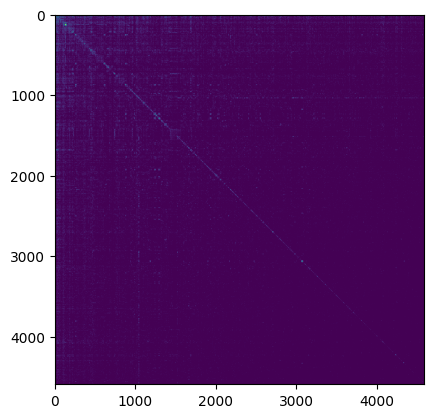

In [170]:
graph_df = nx.from_pandas_edgelist(links, 'linkSource','linkTarget')
A_matrix = nx.adjacency_matrix(graph_df)
np_graph = A_matrix.toarray()
plt.imshow(np_graph)
plt.show()


In [171]:
dist_matrix = shortest_path(csgraph=A_matrix)

In [172]:
dist_matrix = np.nan_to_num(dist_matrix,nan=0,posinf=0,neginf=0) # filter out inf and nan values

#some statistics about shortest paths :
print('The longest distance between two articles on wikispeedia is',int(np.max(dist_matrix)), 'links')
print('The average shortest path on wikispeedia is',np.average(dist_matrix), 'links')

The longest distance between two articles on wikispeedia is 5 links
The average shortest path on wikispeedia is 2.521497677372555 links


# Data distribution & visualisation 

### Finished paths

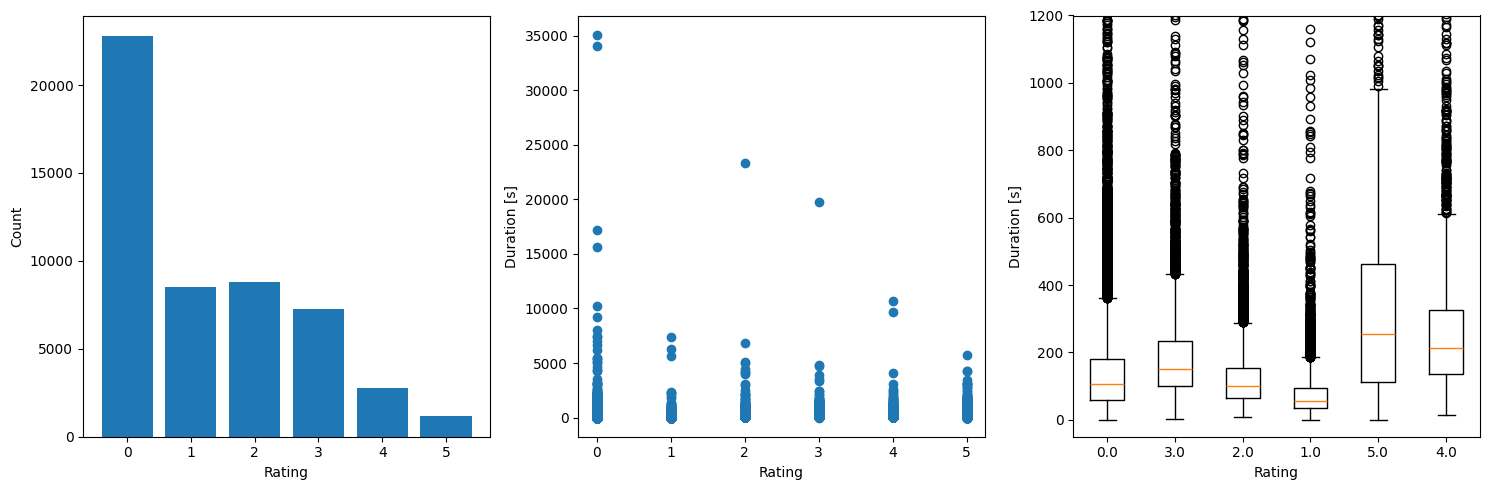

In [173]:
path_finished = dfs['paths_finished']

# Ratings according to the duration
plt.figure(figsize=(15, 5))

#For the visualisation purpose, set Nan as 0: 
path_finished.rating = path_finished.rating.fillna(0.0)
plt.subplot(1, 3, 2) # 1st subplot (1 row, 3 columns, subplot 2)
plt.plot(path_finished.rating, path_finished.durationInSec, 'o')
plt.xlabel('Rating')
plt.ylabel('Duration [s]')


plt.subplot(1, 3, 3) # 2st subplot (1 row, 3 columns, subplot 3)
plt.boxplot([path_finished['durationInSec'][path_finished['rating']== cat] for cat in path_finished.rating.unique()],
labels = path_finished.rating.unique())
plt.xlabel('Rating')
plt.ylabel('Duration [s]')
plt.ylim(-50, 1200)

plt.subplot(1, 3, 1) # 2st subplot (1 row, 3 columns, subplot 1)
plt.bar(path_finished.rating.value_counts().index,path_finished.rating.value_counts().values)
plt.xlabel('Rating')
plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Unfinished path

C:\Users\emeri\AppData\Local\Temp\ipykernel_13528\2188923340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The reasons the paths are unfinished: {:.2f}% of {}, {:.2f}% of {}.'.format(type[0]*100, type.index[0], type[1]*100, type.index[1]))


The reasons the paths are unfinished: 62.52% of restart, 37.48% of timeout.
The number of unique target name is 3765 out of 24875.
Within them, the number of target not reach more than one time is 3104 out of 3765


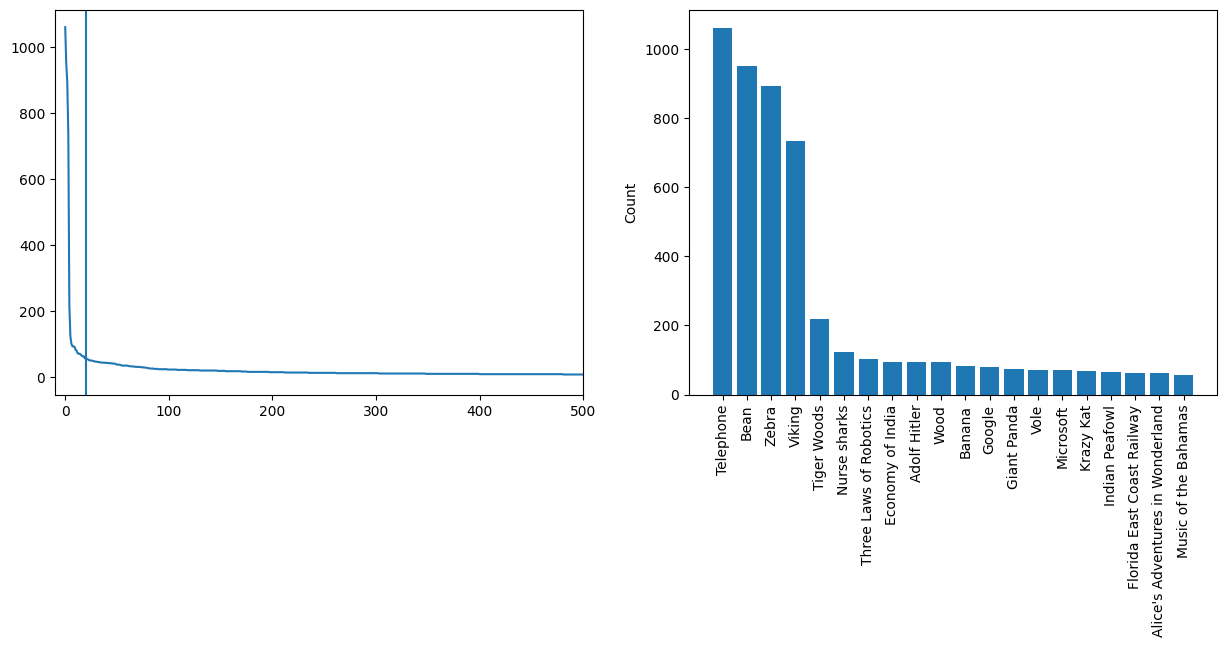

In [174]:
type = path_unfinished.type.value_counts(normalize = True)
print('The reasons the paths are unfinished: {:.2f}% of {}, {:.2f}% of {}.'.format(type[0]*100, type.index[0], type[1]*100, type.index[1]))


unique_target = path_unfinished.target.value_counts()
print('The number of unique target name is {} out of {}.'.format(len(unique_target), len(path_unfinished)))
print('Within them, the number of target not reach more than one time is {} out of {}'.format(len(unique_target[unique_target.values >1]), len(unique_target)))

# Most represented unreached target
plt.figure(figsize=(15, 5))

l = 20

plt.subplot(1, 2, 1) # 1st subplot (1 row, 2 columns, subplot 1)
plt.plot(unique_target.values)
plt.axvline(l)
plt.xlim(-10,500)


plt.subplot(1, 2, 2) # 2nd subplot (1 row, 2 columns, subplot 2)
plt.bar(unique_target[:l].index.str.replace('_', ' '), unique_target[:l].values)
plt.xticks(rotation=90, ha='center')
plt.ylabel('Count')
plt.show()

del l, type, unique_target


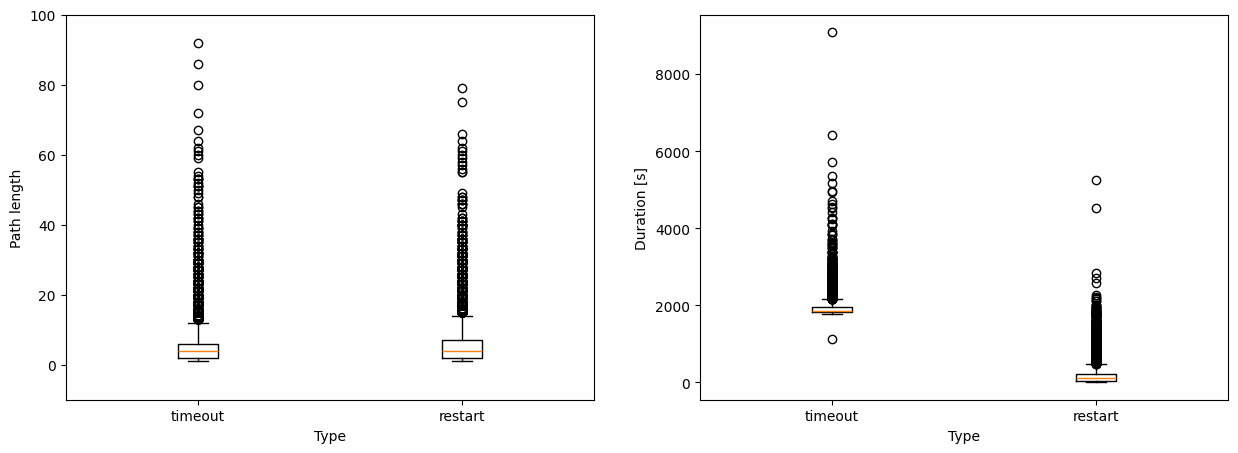

In [175]:
path_unfinished['len_path'] = [len(p) for p in path_unfinished.path.str.split(';') ]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot([path_unfinished.len_path[path_unfinished.type== cat] for cat in path_unfinished.type.unique()],
labels = path_unfinished.type.unique())
plt.xlabel('Type')
plt.ylabel('Path length')
plt.ylim(-10,100)

plt.subplot(1, 2, 2)
plt.boxplot([path_unfinished.durationInSec[path_unfinished.type== cat] for cat in path_unfinished.type.unique()],
labels = path_unfinished.type.unique())
plt.xlabel('Type')
plt.ylabel('Duration [s]')
plt.show()

# Extract people data

In [176]:
categories = dfs['categories']

# Selection of all the articles from a people category
all_people_selection = categories[categories['category'].str.contains('People')]

# Separate the data as people that are main or secondary people
main_people_selection = all_people_selection[all_people_selection['category'].str.contains('subject.People')]
second_people_selection = pd.concat([main_people_selection,all_people_selection]).drop_duplicates(keep=False)

# Verify that all the articles are unique
all_people_selection.info() 
main_people_selection.info()
second_people_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 1 to 5200
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   711 non-null    object
 1   category  711 non-null    object
dtypes: object(2)
memory usage: 16.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 1 to 5200
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   689 non-null    object
 1   category  689 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 250 to 4806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   22 non-null     object
 1   category  22 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [177]:
#Look at the people data set
display(main_people_selection)
display(second_people_selection)

,article,category
1,Áedán_mac_Gabráin,subject.People.Historical_figures
4,Édouard_Manet,subject.People.Artists
8,Óengus_I_of_the_Picts,subject.People.Historical_figures
67,A._E._J._Collins,subject.People.Sports_and_games_people
88,Abbas_I_of_Persia,subject.People.Historical_figures
...,...,...
5188,Zhang_Qian,subject.People.Historical_figures
5190,Zheng_He,subject.People.Historical_figures
5191,Ziad_Jarrah,subject.People.Historical_figures
5197,Zionism,subject.People.Political_People


,article,category
250,Amish,subject.Geography.Peoples
318,Anthropology,subject.Geography.Peoples
467,Azerbaijani_people,subject.Geography.Peoples
679,Black_Seminoles,subject.Geography.Peoples
1208,Crimean_Karaites,subject.Geography.Peoples
1307,Dayuan,subject.Geography.Peoples
1593,Eskimo,subject.Geography.Peoples
1729,Flemish_people,subject.Geography.Peoples
2333,Hutu,subject.Geography.Peoples
2427,Iranian_peoples,subject.Geography.Peoples


- We can observe here, that the second people selection don't design person but more communities and population in which we are not interested in. 
- Now I want to verify whether some person are not in the people category and we missed them. 

In [178]:
individual_category = categories.category.str.split('.').explode().unique()
print('There are {} categories.'.format(len(individual_category)-1))
individual_category
# People, Historical_figures, Artists, Performers_and_composers, Geographers_and_explorers, USA_Presidents, Religious_figures_and_leaders, Political_People, Producers_directors_and_media_figures, 
# Engineers_and_inventors, Military_People, Monarchs_of_Great_Britain, (Divinities), Actors_models_and_celebrities, Philosophers, Human_Scientists, Computing_People

There are 141 categories.


array(['subject', 'History', 'British_History',
       'British_History_1500_and_before_including_Roman_Britain',
       'People', 'Historical_figures', 'Countries', 'Geography',
       'European_Geography', 'European_Countries', 'Artists',
       'Business_Studies', 'Currency', 'General_history',
       'Military_History_and_War', 'Science', 'Physics',
       'Space_Astronomy', 'Everyday_life', 'Sports_events', 'Storms',
       'Recent_History', 'Geology_and_geophysics', 'Natural_Disasters',
       'Design_and_Technology', 'Railway_transport',
       'Sports_and_games_people', 'Biology', 'Health_and_medicine',
       'Music', 'Performers_and_composers', 'IT',
       'Computing_hardware_and_infrastructure', 'Companies',
       'General_Physics', 'Language_and_literature', 'Novels',
       'Musical_genres_styles_eras_and_events', 'Mammals', 'Plants',
       'Mathematics', 'Geography_of_the_Middle_East',
       'Ancient_History_Classical_History_and_Mythology',
       'British_History_15

In [179]:
# People, Historical_figures, Artists, Performers_and_composers, Geographers_and_explorers, USA_Presidents, Religious_figures_and_leaders, Political_People, Producers_directors_and_media_figures, 
# Engineers_and_inventors, Military_People, Monarchs_of_Great_Britain, (Divinities), Actors_models_and_celebrities, Philosophers, Human_Scientists, Computing_People
# Selection of all the articles from a people category
values_to_check = ['Historical_figures', 'Artists', 'Performers_and_composers', 'Geographers_and_explorers', 
                   'USA_Presidents', 'Religious_figures_and_leaders', 'Political_People', 'Producers_directors_and_media_figures',
                   'Engineers_and_inventors', 'Military_People', 'Monarchs_of_Great_Britain', 'Actors_models_and_celebrities', 
                   'Philosophers', 'Human_Scientists', 'Computing_People'
                   ] # without Divinities

a = categories[categories['category'].str.contains('|'.join(values_to_check))]
b = a[a['category'].str.contains('subject.People' )]
not_labelled_people_selection = pd.concat([a,b]).drop_duplicates(keep=False)
not_labelled_people_selection

,article,category
69,AC_DC,subject.Music.Performers_and_composers
358,Arctic_Monkeys,subject.Music.Performers_and_composers
1417,Duran_Duran,subject.Music.Performers_and_composers
2444,Iron_Maiden,subject.Music.Performers_and_composers
2694,Ladysmith_Black_Mambazo,subject.Music.Performers_and_composers
2936,Magdalena_Abakanowicz,subject.Art.Artists
3066,McFly_(band),subject.Music.Performers_and_composers
3357,Niccolò_dell'Abbate,subject.Art.Artists
3380,Nirvana_(band),subject.Music.Performers_and_composers
3427,Oasis_(band),subject.Music.Performers_and_composers


We can notice that some person are not labelled as people. 
    - For the music.Performers_and_composers: they are groups so it make sens
    - For the Art.Artits: Within this category two of them are not labelled as subject.People.Artists but only subject.Artists : Niccolò_dell'Abbate & Magdalena_Abakanowicz. --> It is a mistake 

### Are people linked to people or other?

In [287]:
people_links = pd.DataFrame.from_dict(links)
people_links.rename(columns={'linkSource': 'fromarticle', 'linkTarget': 'article'}, inplace=True)
people_links = pd.merge(main_people_selection, people_links)
display(people_links)

#rename columns manually because pd.rename does not work for some bizarre reason..

people_links.columns = ['to_article', 'to_category', 'article']
display(people_links)

categories_df = pd.DataFrame.from_dict(categories)
people_links = pd.merge(people_links, categories_df,'left')


display(people_links)

,article,category,fromarticle
0,Abel_Tasman,subject.People.Geographers_and_explorers,Fiji
1,Abel_Tasman,subject.People.Geographers_and_explorers,James_Cook
2,Abel_Tasman,subject.People.Geographers_and_explorers,New_Zealand
3,Abel_Tasman,subject.People.Geographers_and_explorers,Pacific_Ocean
4,Abel_Tasman,subject.People.Geographers_and_explorers,Tonga
...,...,...,...
10235,Zoroaster,subject.People.Religious_figures_and_leaders,Neoclassicism
10236,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_Empire
10237,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_literature
10238,Zoroaster,subject.People.Religious_figures_and_leaders,Philosophy


,to_article,to_category,article
0,Abel_Tasman,subject.People.Geographers_and_explorers,Fiji
1,Abel_Tasman,subject.People.Geographers_and_explorers,James_Cook
2,Abel_Tasman,subject.People.Geographers_and_explorers,New_Zealand
3,Abel_Tasman,subject.People.Geographers_and_explorers,Pacific_Ocean
4,Abel_Tasman,subject.People.Geographers_and_explorers,Tonga
...,...,...,...
10235,Zoroaster,subject.People.Religious_figures_and_leaders,Neoclassicism
10236,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_Empire
10237,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_literature
10238,Zoroaster,subject.People.Religious_figures_and_leaders,Philosophy


,to_article,to_category,article,category
0,Abel_Tasman,subject.People.Geographers_and_explorers,Fiji,subject.Countries
1,Abel_Tasman,subject.People.Geographers_and_explorers,Fiji,subject.Geography.Geography_of_Oceania_Austral...
2,Abel_Tasman,subject.People.Geographers_and_explorers,James_Cook,subject.People.Geographers_and_explorers
3,Abel_Tasman,subject.People.Geographers_and_explorers,New_Zealand,subject.Countries
4,Abel_Tasman,subject.People.Geographers_and_explorers,New_Zealand,subject.Geography.Geography_of_Oceania_Austral...
...,...,...,...,...
11894,Zoroaster,subject.People.Religious_figures_and_leaders,Neoclassicism,subject.Art.Art
11895,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_Empire,subject.History.Ancient_History_Classical_Hist...
11896,Zoroaster,subject.People.Religious_figures_and_leaders,Persian_literature,subject.Language_and_literature.Literature_types
11897,Zoroaster,subject.People.Religious_figures_and_leaders,Philosophy,subject.Religion.Philosophy


<function matplotlib.pyplot.show(close=None, block=None)>

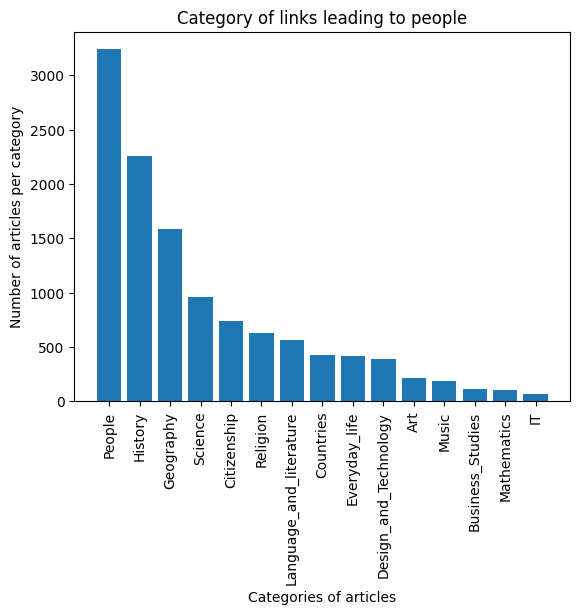

In [288]:
#first copy the data_frame
reduced_categories = people_links.copy(deep=True)

#extract the reduced categories and add them to the copied df
reduced_categories_list = [category.replace('subject.', '').split('.')[0] for category in reduced_categories['category']]
reduced_categories = reduced_categories.assign(simple_category = reduced_categories_list)

#count the new distribution and plot it
category_distribution = reduced_categories['simple_category'].value_counts()

fig, ax = plt.subplots()
ax.bar(category_distribution.index, category_distribution.values)
ax.set_ylabel('Number of articles per category')
ax.set_xlabel('Categories of articles')
ax.set_xticks(np.arange(len(category_distribution.values)), category_distribution.index, rotation = 90)
ax.set_title('Category of links leading to people')
plt.show

### Are linked people also linked to the same domain?

### Determine people gender based on article

### Data distribution

<function matplotlib.pyplot.show(close=None, block=None)>

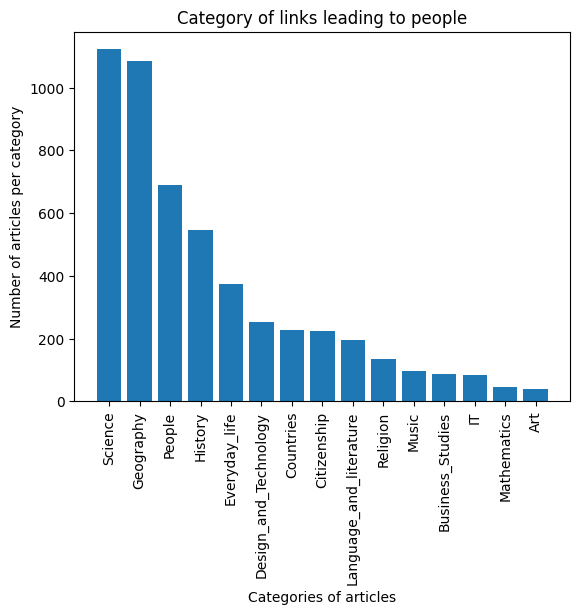

In [278]:
#first copy the data_frame
reduced_categories = categories.copy(deep=True)

#extract the reduced categories and add them to the copied df
reduced_categories_list = [category.replace('subject.', '').split('.')[0] for category in reduced_categories['category']]
reduced_categories = reduced_categories.assign(simple_category = reduced_categories_list)

#count the new distribution and plot it
category_distribution = reduced_categories['simple_category'].value_counts()

fig, ax = plt.subplots()
ax.bar(category_distribution.index, category_distribution.values)
ax.set_ylabel('Number of articles per category')
ax.set_xlabel('Categories of articles')
ax.set_xticks(np.arange(len(category_distribution.values)), category_distribution.index, rotation = 90)
ax.set_title('Category of links leading to people')
plt.show


### Distribution of fame categories

<function matplotlib.pyplot.show(close=None, block=None)>

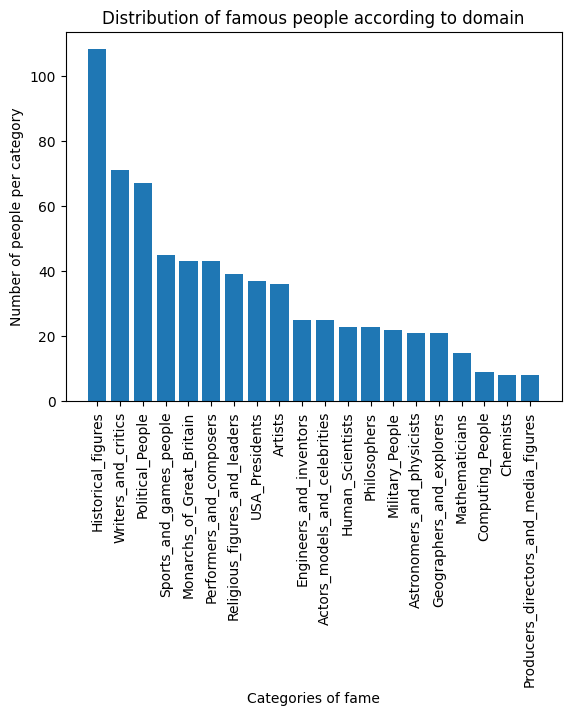

In [181]:
#categories = pd.unique(main_people_selection['category'])
import numpy as np

categories_distribution_df = main_people_selection['category'].value_counts()
categories_ = [category.replace('subject.People.', '') for category in categories_distribution_df.index]
cat_pos = np.arange(len(categories_))

fig, ax = plt.subplots()
ax.bar(cat_pos, categories_distribution_df.values)
ax.set_ylabel('Number of people per category')
ax.set_xlabel('Categories of fame')
ax.set_xticks(cat_pos, categories_, rotation = 90)
ax.set_title('Distribution of famous people according to domain')
plt.show

In [182]:
reduced_categories

,article,category,simple_category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...,History
1,Áedán_mac_Gabráin,subject.People.Historical_figures,People
2,Åland,subject.Countries,Countries
3,Åland,subject.Geography.European_Geography.European_...,Geography
4,Édouard_Manet,subject.People.Artists,People
...,...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements,Science
5200,Zoroaster,subject.People.Religious_figures_and_leaders,People
5201,Zuid-Gelders,subject.Geography.European_Geography,Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages,Language_and_literature


In [183]:
reduced_categories.loc[reduced_categories['article'] == 'Jesus', 'simple_category']

2536    Religion
2537      People
Name: simple_category, dtype: object

In [184]:
starting_points = pd.DataFrame([path.split(';')[0] for path in paths_finished['path']])
finishing_points = pd.DataFrame([path.split(';')[-1] for path in paths_finished['path']])

starting_counts = pd.DataFrame(starting_points.value_counts())
finishing_counts = pd.DataFrame(finishing_points.value_counts())

starting_list = [start[0] for start in starting_counts.index.tolist()]
finishing_list = [finish[0] for finish in finishing_counts.index.tolist()]

start_cat = [reduced_categories.loc[reduced_categories['article'] == start,'simple_category'].values.tolist() for start in starting_list]
finish_cat = [reduced_categories.loc[reduced_categories['article'] == finish,'simple_category'].values.tolist() for finish in finishing_list]

In [185]:
starting_list

['Brain',
 'Asteroid',
 'Theatre',
 'Pyramid',
 'Batman',
 'Bird',
 'Cat',
 'Dog',
 'Jesus',
 'Beer',
 'Computer',
 'England',
 'Flower',
 'Adolf_Hitler',
 'Automobile',
 'China',
 'Aircraft',
 'Africa',
 'Calculus',
 'Cheese',
 'Apple',
 'God',
 'Nintendo',
 'Brazil',
 'Achilles_tendon',
 'Pikachu',
 'Weed',
 'Chocolate',
 'Dinosaur',
 'AIDS',
 'Internet',
 'Archbishop_of_Canterbury',
 'Art',
 'Electricity',
 'Mario',
 'Harry_Potter',
 'Google',
 'Aluminium_chloride',
 'Hydrogen',
 'Telephone',
 'Citrus',
 'Manchester',
 'Canada',
 'Colombia',
 'Computer_programming',
 'Pac-Man',
 'Crystal',
 'Chemistry',
 'United_States',
 'Coffee',
 'Banana',
 'Germany',
 'Pluto',
 'Glass',
 '14th_century',
 'David_Beckham',
 'Linux',
 'Tennis',
 'Shark',
 'Love',
 'Christianity',
 'Brothers_Grimm',
 'Star_Wars',
 'Dolphin',
 'Bird_migration',
 'ASCII',
 'The_Cat_in_the_Hat',
 'California',
 'Smog',
 'The_Beatles',
 'Continent',
 'Moon',
 'Pea',
 'Fruit',
 'Electron',
 'Superman',
 'Amazon_parrot',


In [186]:
start_cat
nb_double = 0
for i in start_cat:
    if len(i)>1:
        nb_double+=1

print(nb_double)
print(len(start_cat))

578
4134
